## This notebook deals with Sod shock tube problem using Steger-warming scheme

## For a shock tube problem:

## $\frac{\partial \textbf{U}}{\partial t}+\frac{\partial \textbf{F}}{\partial x}=\textbf{R}$

## where:

## $\textbf{U}=\left[\begin{array}{l}
\rho \\
m \\
\hat{E}
\end{array}\right]$

## $\textbf{F(U)}=\left[\begin{array}{c}
m \\
\left(m^{2} / \rho\right)+p \\
(\hat{E}+p)m/\rho
\end{array}\right]$

## $\textbf{R}=\left[\begin{array}{l}
0 \\
0 \\
0
\end{array}\right]$

$\rho$ is density

m is mass flow rate

$\hat{E}$=$\rho e$ is total energy per volume

In [13]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [14]:
cd(dirname(pwd()))
cd("src")
include("Tools.jl")
include("FiniteDifference.jl")
include("TimeMarching.jl")
include("Initial.jl")
include("Systems.jl")
include("BoundaryCondition.jl")

using ..Tools
using ..FiniteDifference
using ..TimeMarching
using ..Initial
using ..Systems
using ..BoundaryCondition
pwd()

"C:\\Users\\liyux\\github\\thermo-network\\src"

## Parameters

In [15]:
    # no wall heat
    righthand=0
    

0

## Initialization

In [20]:

    # Initial spacial variables
    nx = 201   
    gamma = 1.4
    xlim = (0.0,1.0)
    Δx = (xlim[2]-xlim[1])/nx
    ux1,uu1=Initial.initial_sod(nx,xlim,gamma)

    # set ShockTubeSystem structs
    sys1=Systems.ShockTubeSystem(gamma,Δx)

    # get every property from the initial uu
    uueverythinginitial1=Systems.UUtoEverything(uu1,sys1)

    # Initial time and storage arrays
    t = 0.0
    thist = []
    uhist1 = []


0-element Array{Any,1}

## Time Marching

In [21]:
    Δt = 0.00025

    println("Δx=",Δx);
    println("Δt=",Δt);



    #Calculation time
    tf = 0.25
    tsample = 10*Δt
    T = Δt:Δt:tf

    # Push it with time!
    for ti in T
        
        t, uu1 = TimeMarching.stegerwarmingrk1!(t,uu1,righthand,sys1,Δt)
        
        uueverything1=Systems.UUtoEverything(uu1,sys1)
    
    
        (isapprox(mod(t,tsample),0,atol=1e-12) || isapprox(mod(t,tsample),tsample,atol=1e-12)) ? push!(thist,deepcopy(t)) : nothing
        (isapprox(mod(t,tsample),0,atol=1e-12) || isapprox(mod(t,tsample),tsample,atol=1e-12)) ? push!(uhist1,deepcopy(uueverything1)) : nothing
    end
    

Δx=0.004975124378109453
Δt=0.00025


## Plotting

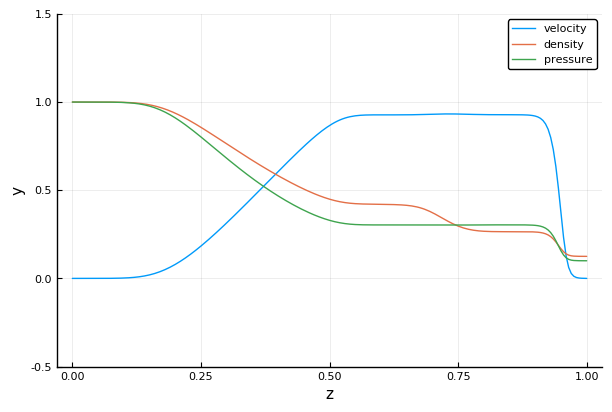

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\github\thermo-network\src\tmp.gif
└ @ Plots C:\Users\liyux\.juliapro\JuliaPro_v1.3.1-2\packages\Plots\B2J6j\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\liyux\\github\\thermo-network\\src\\tmp.gif")
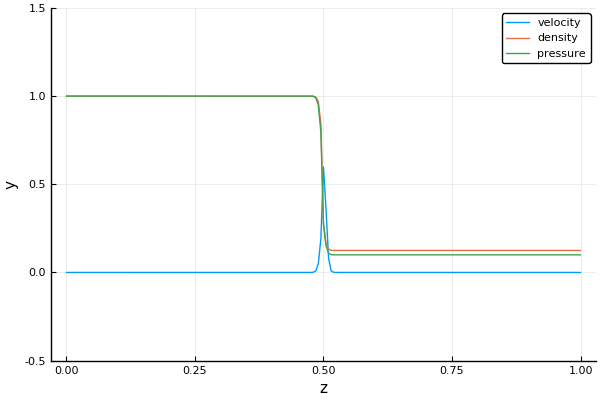

In [23]:
@gif for i in 1:length(uhist1)
    
      plot(ux1,uhist1[i].u,ylim=(-0.5,1.5),xlabel="z",ylabel="y",label="velocity")
      plot!(ux1,uhist1[i].ρ,ylim=(-0.5,1.5),xlabel="z",ylabel="y",label="density")
      plot!(ux1,uhist1[i].p,ylim=(-0.5,1.5),xlabel="z",ylabel="y",label="pressure")
#     plot!(ux1,uhist1[i].h,ylim=(28,32),xlabel="z",ylabel="h",label="enthalpy")
end